In [1]:
import sklearn
sklearn.__version__

'1.1.3'

# 개요
인공지능의 한분야로 머신러닝,

머신러닝: 데이터를 통해서 기계가 스스로 학습하게끔

명시적으로 프로그램을 작성하지 않고, 컴퓨터가 스스로 규칙을 학습하는 연구 분야

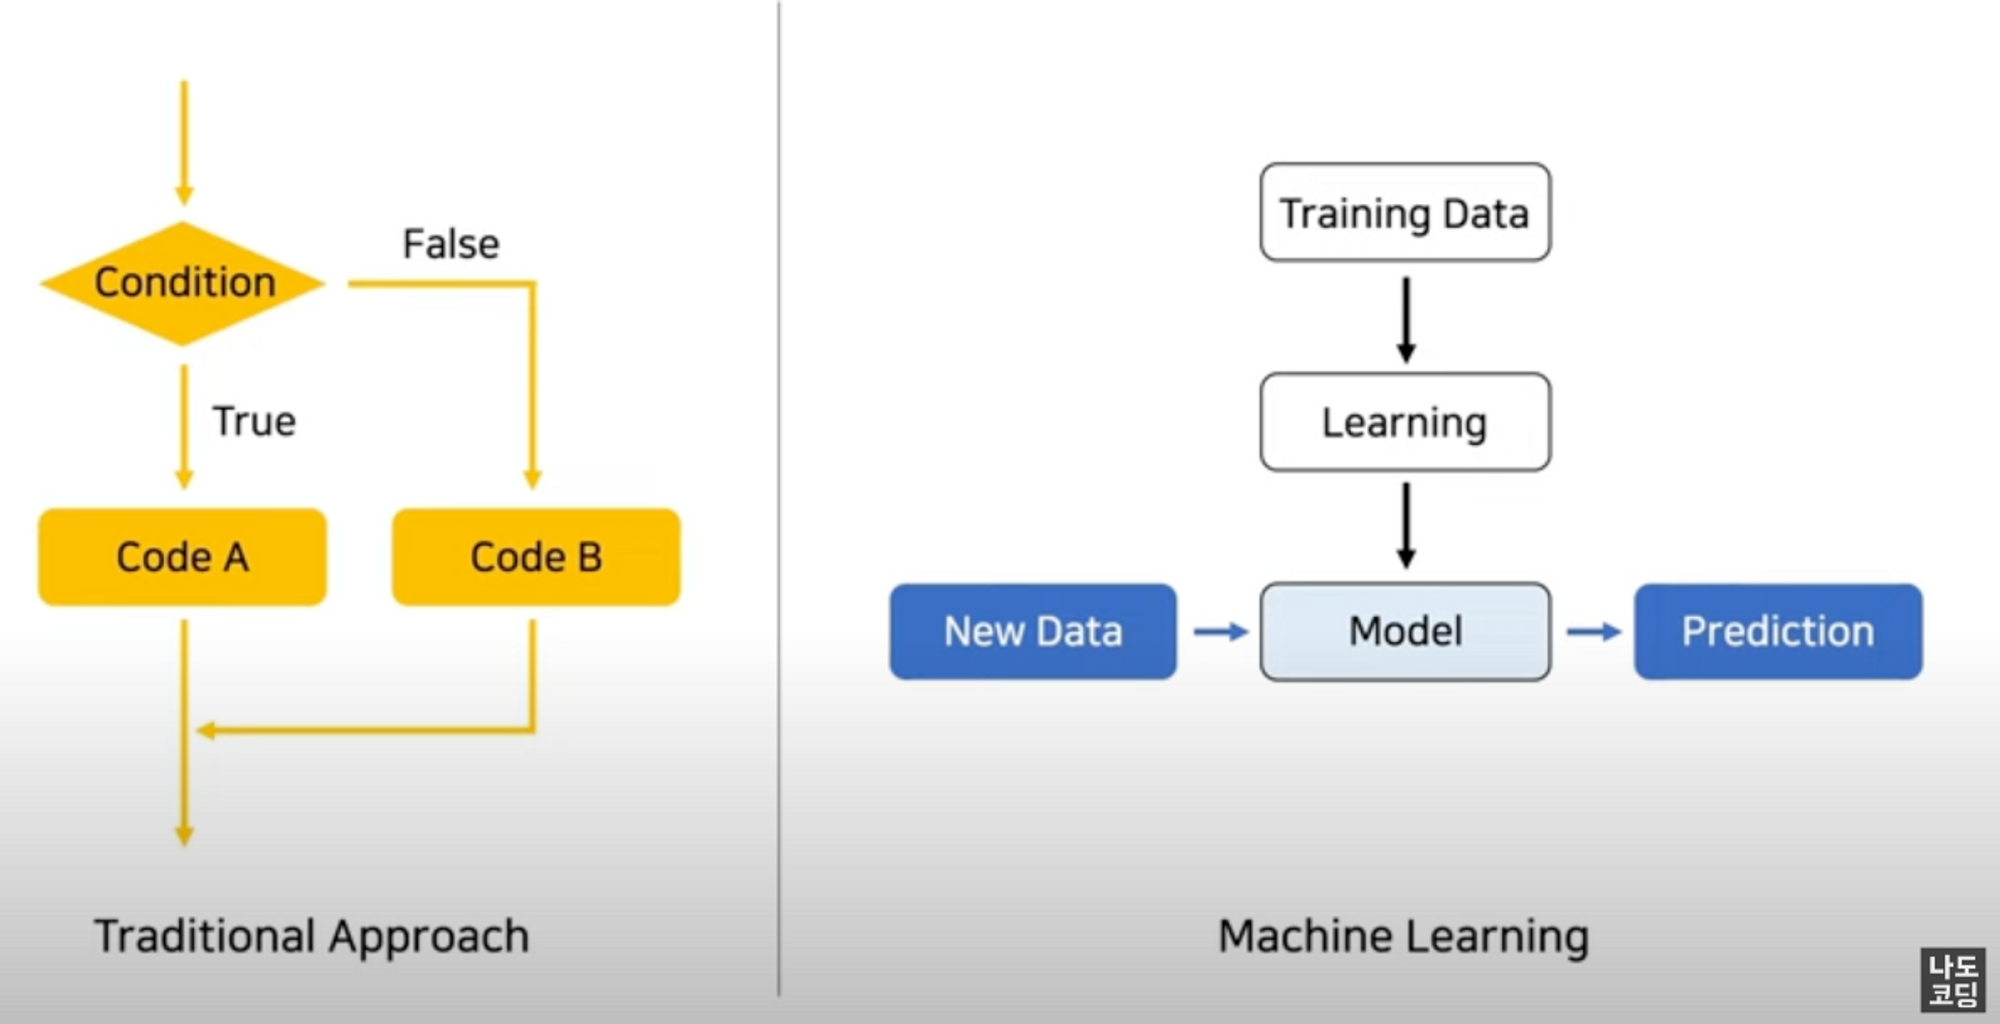

- 머신러닝의 분류
    - Supervised Learning 지도학습
        - 정답 있음
        - 데이터 분류 / 올바른 결과 예측
    - Unsupervised Learning 비지도 학습
        - 정답 없음
        - 데이터의 유의미한 패턴, 구조 발견
    - Reinforcement Learning 강화학습
        - 행동에 대한 보상
        - 누적 보상을 최대화하는 의사결정

# 지도 학습
- **분류** - 범주형 변수
    
    주어진 데이터를 정해진 범주에 따라 분류
    
    예측 결과가 숫자가 아닐 때
    
- **회귀** - 연속형 변수

# 1. Linear Regression
|X|y|
|---|---|
|독립변수|종속변수|
|원인|결과|
|입력변수|출력변수|
|feature|target, label|

실제 값과 예측 값 차이(잔차)의 제곱의 합을 최소화
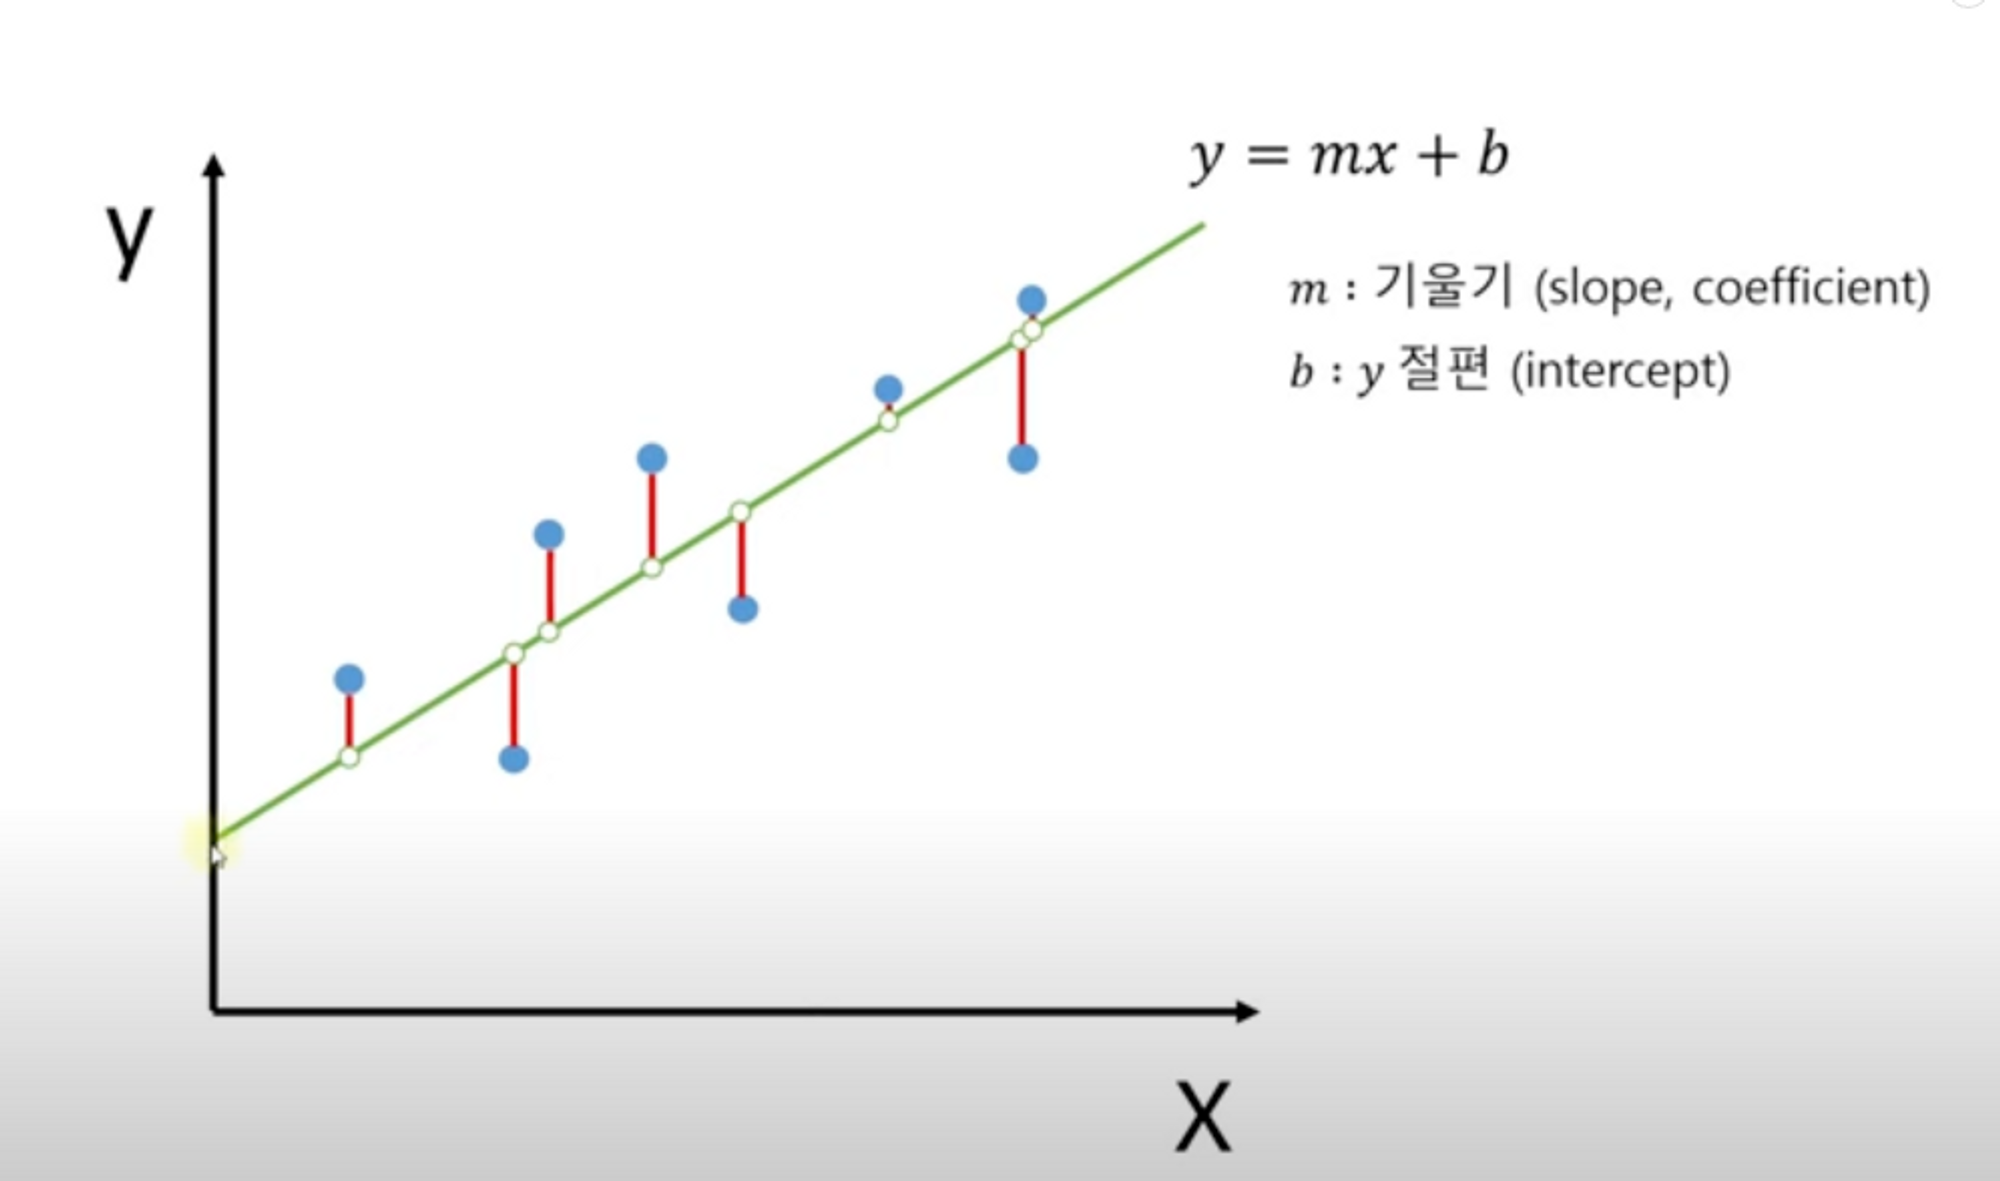

## 공부 시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [3]:
dataset.head()

hour  score
0   0.5     10
1   1.2      8
2   1.8     14
3   2.4     26
4   2.6     22

In [8]:
dataset.tail()

hour  score
15   6.9     58
16   7.2     76
17   8.4     86
18   8.6     90
19  10.0    100

In [5]:
X = dataset.iloc[:,:-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수 - 원인) - 첫번째 열
y = dataset.iloc[:,-1].values # 마지막 컬럼 데이터 (종속변수 - 결과) - 두번째 열

In [6]:
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

In [7]:
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100])

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) #학습(모델 생성)

LinearRegression()

In [11]:
y_pred = reg.predict(X) #X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

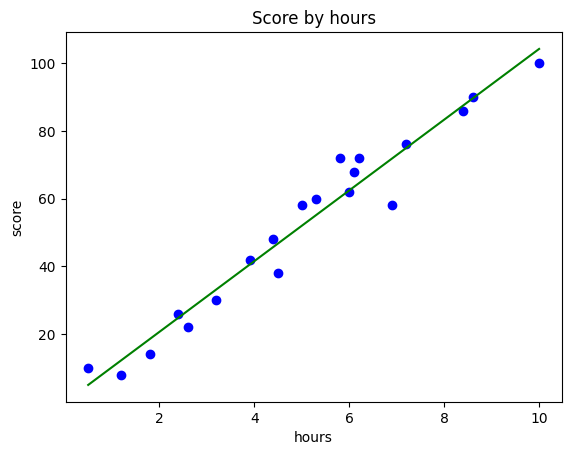

In [12]:
plt.scatter(X,y,color='blue') #산점도
plt.plot(X,y_pred, color='green') #선그래프
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [13]:
print('9시간 공부했을 때 예상 점수: ', reg.predict([[9]]))

9시간 공부했을 때 예상 점수:  [93.77478776]


In [15]:
reg.coef_ #기울기

array([10.44369694])

In [16]:
reg.intercept_ #y절편

-0.218484702867201

# 데이터 세트 분리

- 훈련 세트 80
- 테스트 세트 20

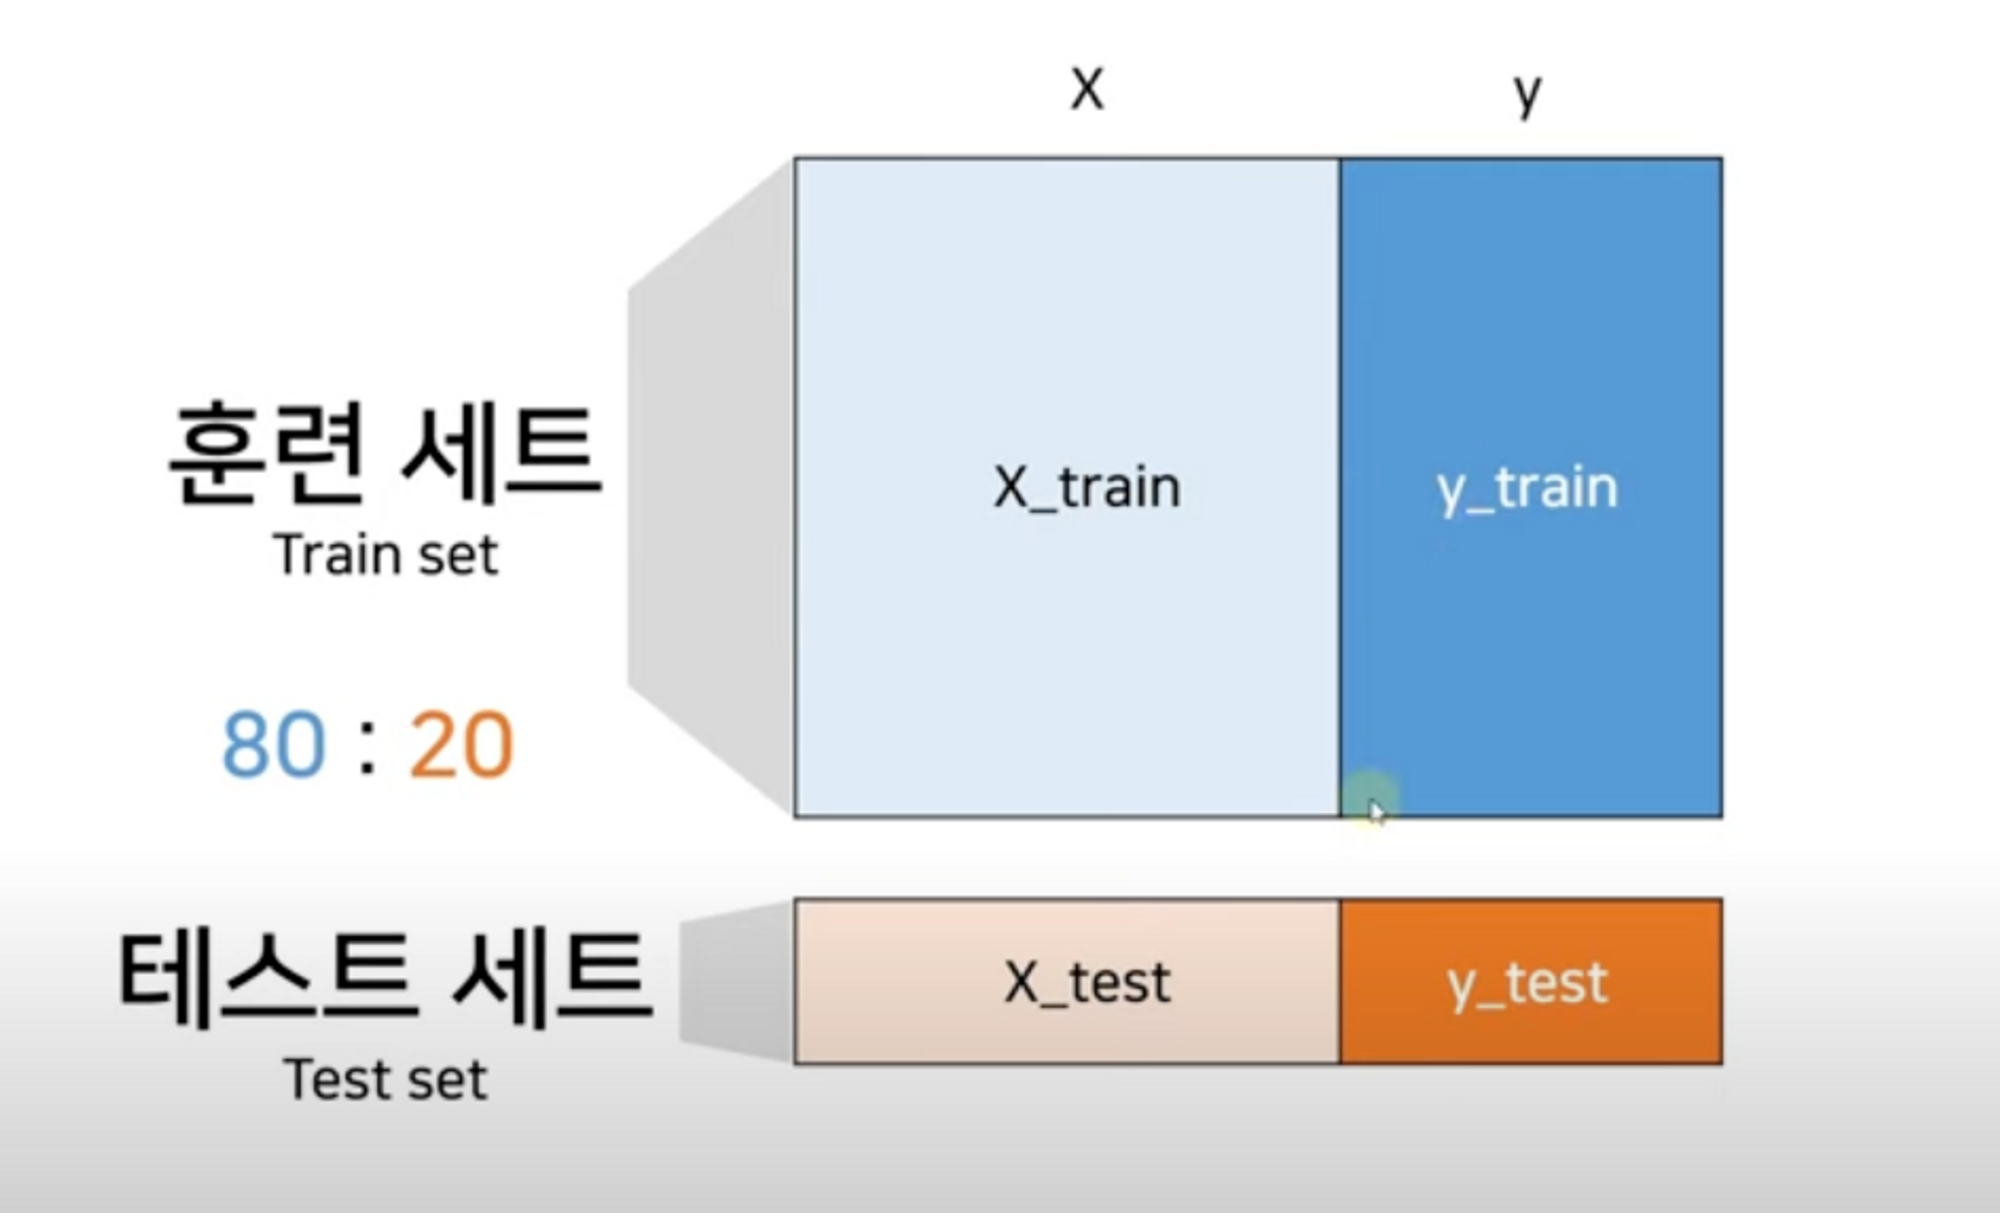

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [19]:
X = dataset.iloc[:,:-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수 - 원인) - 첫번째 열
y = dataset.iloc[:,-1].values # 마지막 컬럼 데이터 (종속변수 - 결과) - 두번째 열

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) #훈련 80 테스트 20

### 분리된 데이터를 통한 모델링

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [22]:
reg.fit(X_train, y_train) #훈련세트로 학습

LinearRegression()

### 데이터 시각화 (훈련세트)

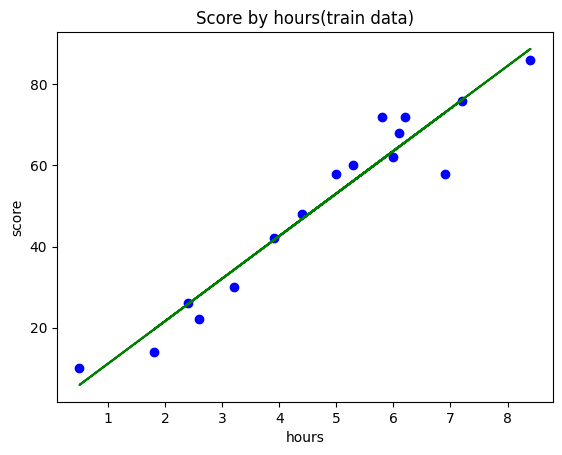

In [25]:
plt.scatter(X_train,y_train,color='blue') #산점도
plt.plot(X_train,reg.predict(X_train), color='green') #선그래프
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트세트)

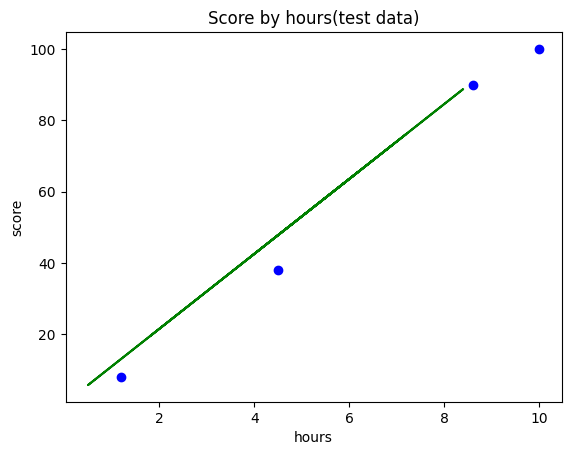

In [27]:
plt.scatter(X_test,y_test,color='blue') #산점도
plt.plot(X_train,reg.predict(X_train), color='green') #선그래프
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [28]:
reg.coef_ #기울기

array([10.49161294])

In [29]:
reg.intercept_ #y절편

0.6115562905169796

### 모델 평가

In [30]:
reg.score(X_test, y_test) #테스트 세트를 통한 모델 평가

0.9727616474310156

In [31]:
reg.score(X_train, y_train) #훈련 세트를 통한 모델 평가

0.9356663661221668

# 경사 하강법 (Gradient Descent)

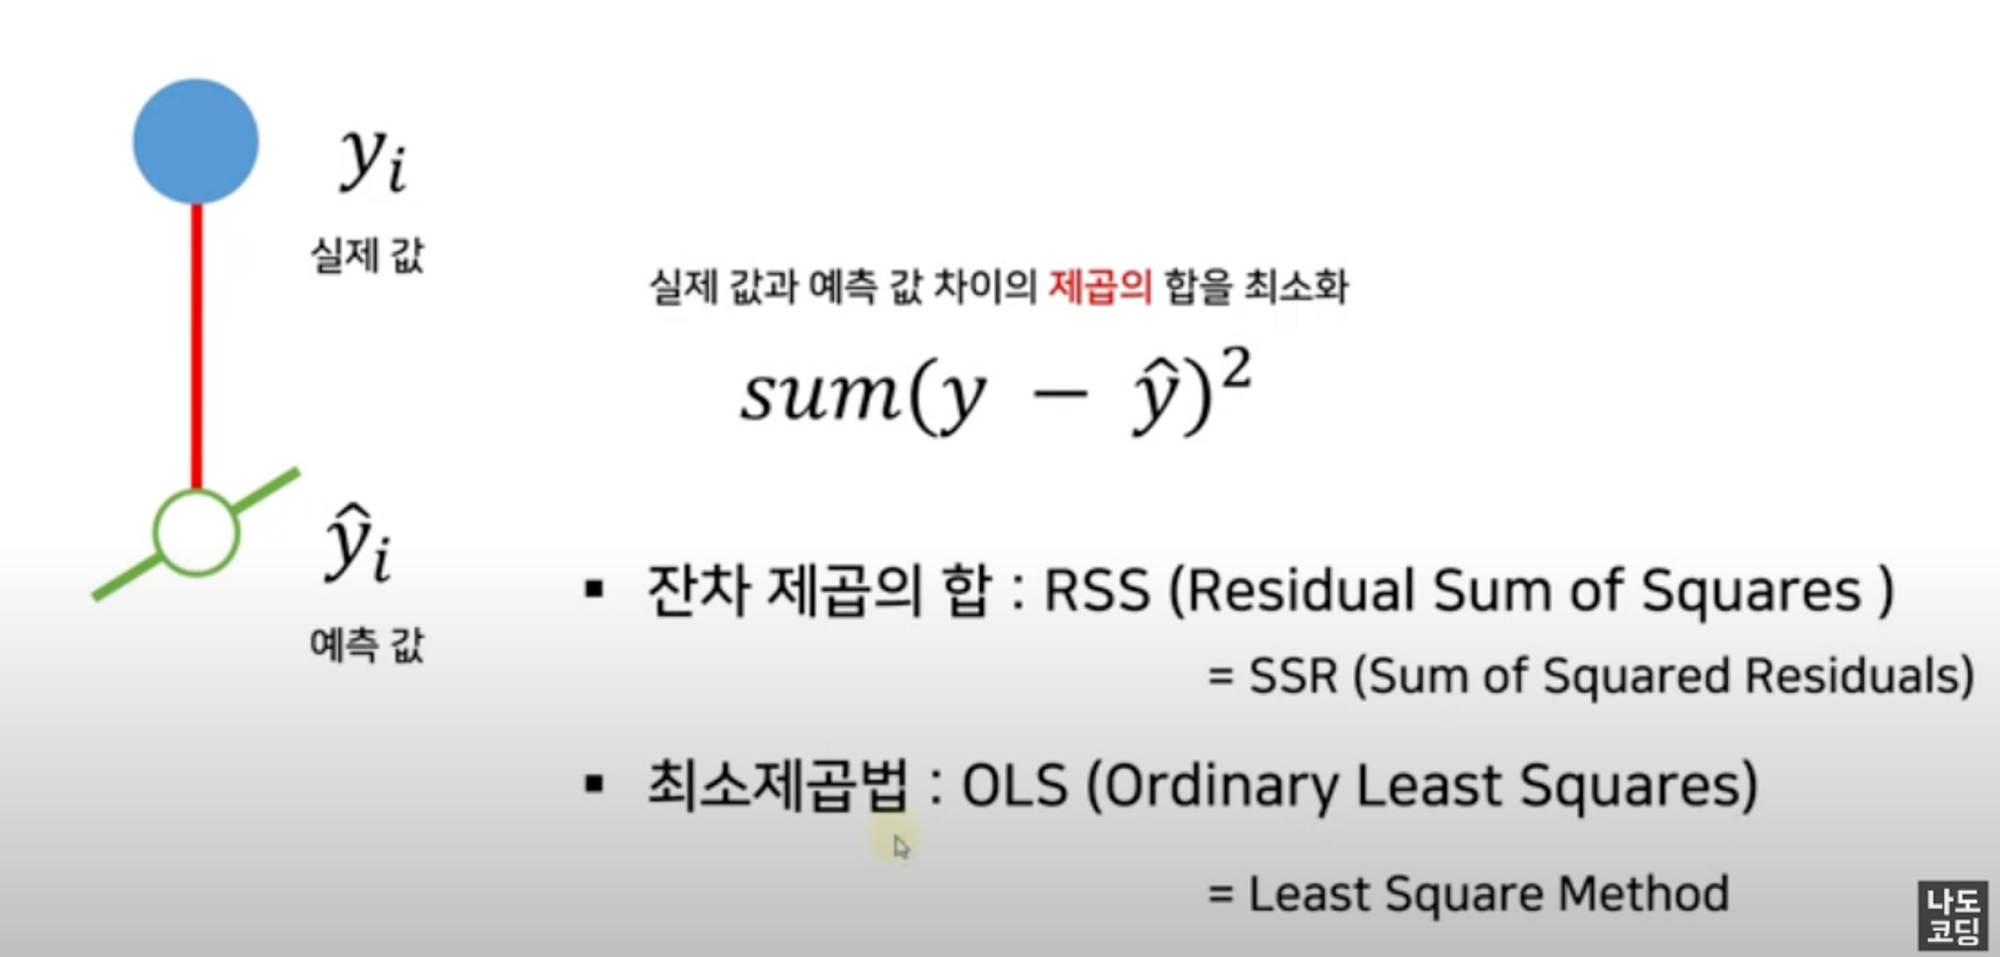

최소 제곱법 → 잔차제곱의 합을 최소로 하는 회귀식을 찾는 방법 

최소 제곱법의 단점) 노이즈에 취약함, 이상치에 취약함, 독립변수가 많아지면 컴퓨터 자원이 많이 필요로 함

경사하강법 Gradient Descent 

목표) 잔차 제곱의 합이 가장 작아지도록 함

학습률(Learning rate)

에포트(Epoch) - 최적의 훈련값(파라미터)를 찾기 위해서 모든 훈련 세트를 다 사용함

확률적 경사 하강법 Stochastic Gradient Descent

매 단계마다 무작위로 하나의 데이터를 선택하고 그 데이터에 대해서만 기울기를 계산함

In [33]:
from sklearn.linear_model import SGDRegressor #SGD: Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

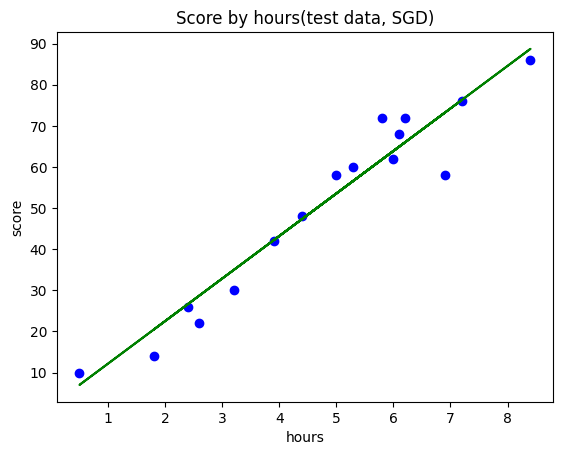

In [49]:
plt.scatter(X_train,y_train,color='blue') #산점도
plt.plot(X_train,sr.predict(X_train), color='green') #선그래프
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [37]:
sr.coef_ #기울기 10.4916

array([10.33996335])

In [38]:
sr.intercept_ #y절편 0.6115

array([1.83458068])

In [39]:
sr.score(X_test, y_test) #테스트 세트를 통한 모델 평가

0.9693240070935966

In [40]:
sr.score(X_train, y_train) #훈련 세트를 통한 모델 평가

0.9349817045293604

In [54]:
sr2 = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0)
# 에포크횟수(훈련세트 반복 횟수): max_iter
# 학습률: eta0, 
#verbose=1

In [55]:
sr2.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, random_state=0)

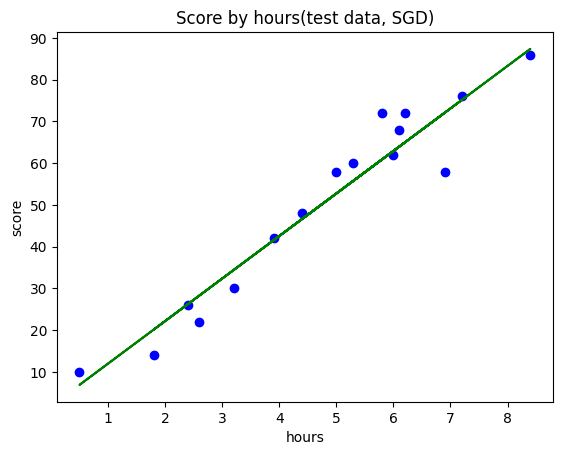

In [56]:
plt.scatter(X_train,y_train,color='blue') #산점도
plt.plot(X_train,sr2.predict(X_train), color='green') #선그래프
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()